In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import torch
from PIL import Image
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

model = None


def initialize_model():
    global model
    model =  mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)


def inference(images, conf_threshold=0.5):
    """
    Perform inference on a batch of images using MediaPipe Pose to detect keypoints.

    Args:
        images (list): List of PIL.Image images.

    Returns:
        list: A list of keypoints for each image. Each element is a list of tuples (x, y, z, visibility).
              The order of keypoints matches the order of the input image list.
    """
    global model
    keypoints_list = []  # To store the keypoints for each image in the same order.

    for idx, image in enumerate(images):
        # Convert PIL.Image to numpy array and then to RGB for MediaPipe processing.
        image_np = np.array(image)
        image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

        # Process the image with MediaPipe Pose.
        results = model.process(image_rgb)

#         if results.pose_landmarks:
#             # Extract keypoints as (x, y, z, visibility).
#             keypoints = [
#                 (landmark.x, landmark.y, landmark.z, landmark.visibility)
#                 for landmark in results.pose_landmarks.landmark
#             ]
#             print('keypoints:', np.shape(keypoints))
#         else:
#             keypoints = []  # Empty list if no landmarks are detected.

#         # Append keypoints to maintain order with images
#         keypoints_list.append(keypoints)
        
        if results.pose_world_landmarks:
            keypoints = []
            for landmark in results.pose_world_landmarks.landmark:
                x = landmark.x if landmark.visibility > conf_threshold else np.nan
                y = landmark.y if landmark.visibility > conf_threshold else np.nan
                z = landmark.z if landmark.visibility > conf_threshold else np.nan

                keypoints.append([x, y,z])

            keypoints_list.append(keypoints)
        else:
            # Append an empty list if no keypoints are detected
            keypoints_list.append(np.full((33, 3), np.nan))

    return keypoints_list




def readImages(interval, localStoragePath, userId):
  pass

def postureDetect(interval=60):
  """
    Posture detection pipeline. This function reads images from the local storage, performs inference on them, and sends the results to the server.

    Args:
    - interval (int): Interval in seconds to read images from the local storage.

    """
  initialize_model()
  results = inference(images)
  return results




In [6]:
data_path = "../../AI System Data/Lean Forward/frames"
image_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
batch_size = 20
counter = 0
initialize_model()
keypoints_list = []  # To store the keypoints for each image in the same order.
conf_threshold=0.5
images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[0:batch_size]]
for idx, image in enumerate(images):
    # Convert PIL.Image to numpy array and then to RGB for MediaPipe processing.
    image_np = np.array(image)
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe Pose.
    results = model.process(image_rgb)

#         if results.pose_landmarks:
#             # Extract keypoints as (x, y, z, visibility).
#             keypoints = [
#                 (landmark.x, landmark.y, landmark.z, landmark.visibility)
#                 for landmark in results.pose_landmarks.landmark
#             ]
#             print('keypoints:', np.shape(keypoints))
#         else:
#             keypoints = []  # Empty list if no landmarks are detected.

#         # Append keypoints to maintain order with images
#         keypoints_list.append(keypoints)

    if results.pose_world_landmarks:
        keypoints = []
        for landmark in results.pose_world_landmarks.landmark:
            x = landmark.x if landmark.visibility > conf_threshold else np.nan
            y = landmark.y if landmark.visibility > conf_threshold else np.nan
            z = landmark.z if landmark.visibility > conf_threshold else np.nan

            keypoints.append([x, y,z])

        keypoints_list.append(keypoints)
    else:
        # Append an empty list if no keypoints are detected
        keypoints_list.append(np.full((33, 3), np.nan))

In [7]:
keypoints_list

[array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]),
 [[-0.06565481424331665, -0.4561006724834442, -0.3749969005584717],
  [-0.0490187369287014, -0.48994410037994385, -0.3728216290473938],
  [-0.04606214165687561, -0.490155905

In [3]:
# Testing the function
data_path = "../../AI System Data/Lean Forward/frames"
image_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
batch_size = 20
counter = 0
results_forward = []

# Initialize the model
initialize_model()

for i in range(len(image_files) // batch_size):
    # Load a batch of images
    images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[counter:counter + batch_size]]
    
    # Perform posture detection on the batch
    batch_results = postureDetect(images)
    
    #Append batch results to the main results list
    results_forward.extend(batch_results)

    # Print keypoints results for the current batch
    for idx, keypoints in enumerate(batch_results):
        print(f"Image {counter + idx}: Keypoints - {keypoints}")
    
    counter += batch_size

#Process remaining images
images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[counter:]]
if images:
    batch_results = postureDetect(images)
    results_forward.extend(batch_results)

    # Print keypoints for remaining images
    for idx, keypoints in enumerate(batch_results):
        print(f"Image {counter + idx}: Keypoints - {keypoints}")

# Print final keypoints results
for idx, keypoints in enumerate(results_forward):
    print(f"Image {idx}: Keypoints - {keypoints}")

Image 0: Keypoints - [[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Image 1: Keypoints - [[0.424843430519104, 0.6854543685913086, -1.512437343597412], [0.4804750084877014, 0.5016617774963379, -1.4587026834487915], [0.5185883045196533, 0.48659074306488037, -1.4600077867507935], [0.5475643873214722, 0.47507035732269287, -1.4598486423492432], [0.3689865469932556, 0.5216304063796997, -1.435597538948059], [0.3304958939552307, 0.5186764001846313, -1.4379551410675049], [0.29768991470336914, 0.513421893119812, -1.4394558668136597], [0.5940765738487244, 

Image 20: Keypoints - [[0.5147053599357605, 0.5764572620391846, -1.5566329956054688], [0.5460625290870667, 0.48655688762664795, -1.4837480783462524], [0.5744052529335022, 0.48425886034965515, -1.4847503900527954], [0.5913702249526978, 0.4810603857040405, -1.4845638275146484], [0.4791041612625122, 0.48787927627563477, -1.4791158437728882], [0.456015944480896, 0.4829949140548706, -1.4805307388305664], [0.438098281621933, 0.4791122376918793, -1.4815400838851929], [0.6147428154945374, 0.49843478202819824, -0.9619590640068054], [0.4054032564163208, 0.4952247440814972, -0.9404381513595581], [0.555497944355011, 0.6561702489852905, -1.343377947807312], [0.47173377871513367, 0.655102014541626, -1.3451508283615112], [0.7571357488632202, 0.8876698613166809, -0.6200670003890991], [0.25761672854423523, 0.8949291706085205, -0.576332688331604], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan,

Image 40: Keypoints - [[0.521051287651062, 0.5667470693588257, -1.5944082736968994], [0.5580787062644958, 0.4712584912776947, -1.5180718898773193], [0.5814136862754822, 0.4718766212463379, -1.5189694166183472], [0.6003624200820923, 0.4762260913848877, -1.5188570022583008], [0.4834684729576111, 0.4710426330566406, -1.5112574100494385], [0.46174946427345276, 0.4707905352115631, -1.5125149488449097], [0.44294220209121704, 0.4665505588054657, -1.5135676860809326], [0.63116455078125, 0.5053751468658447, -0.9888212084770203], [0.41888976097106934, 0.49664273858070374, -0.956639289855957], [0.5669711828231812, 0.6694676876068115, -1.3782789707183838], [0.4761246144771576, 0.6716264486312866, -1.375519871711731], [0.7692147493362427, 0.8926554918289185, -0.6028702855110168], [0.306244820356369, 0.9326643943786621, -0.5420392751693726], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, n

Image 60: Keypoints - [[0.48316866159439087, 0.5960304737091064, -1.669167399406433], [0.5270048379898071, 0.44280993938446045, -1.6024516820907593], [0.5637420415878296, 0.429794043302536, -1.6037801504135132], [0.5921763181686401, 0.41881263256073, -1.6036306619644165], [0.4346931576728821, 0.46191489696502686, -1.590834140777588], [0.40072476863861084, 0.4638493061065674, -1.5930991172790527], [0.36908864974975586, 0.46383655071258545, -1.5946581363677979], [0.6213172674179077, 0.4060171842575073, -1.0190966129302979], [0.338871568441391, 0.46648991107940674, -0.9583020210266113], [0.5523833632469177, 0.6849100589752197, -1.415927529335022], [0.43296632170677185, 0.7109631299972534, -1.4096415042877197], [0.851191520690918, 0.9510552883148193, -0.6181052923202515], [0.17695730924606323, 0.9323791265487671, -0.5377057790756226], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan

Image 80: Keypoints - [[0.5094249844551086, 0.5850903987884521, -1.5435523986816406], [0.5429322123527527, 0.4909590482711792, -1.4682613611221313], [0.570429801940918, 0.48754990100860596, -1.4692643880844116], [0.5881706476211548, 0.4843398630619049, -1.469100832939148], [0.47355136275291443, 0.487209677696228, -1.4624717235565186], [0.4509313106536865, 0.48345208168029785, -1.4639025926589966], [0.4334922134876251, 0.48230817914009094, -1.4649587869644165], [0.6122627258300781, 0.4982788562774658, -0.937335729598999], [0.4030924439430237, 0.4965835511684418, -0.9100025296211243], [0.5546078085899353, 0.6681092977523804, -1.3266853094100952], [0.46353259682655334, 0.6690797805786133, -1.3267924785614014], [0.7746018171310425, 0.9026316404342651, -0.6048100590705872], [0.2471473217010498, 0.9066339731216431, -0.5533969402313232], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan

Image 100: Keypoints - [[0.41674238443374634, 0.6067463159561157, -2.2140722274780273], [0.4126236140727997, 0.4604470431804657, -2.1467347145080566], [0.4365309774875641, 0.43160367012023926, -2.1482722759246826], [0.4577450454235077, 0.4065895080566406, -2.1478278636932373], [0.3472779393196106, 0.532309889793396, -2.1246304512023926], [0.32697635889053345, 0.5523872375488281, -2.126905918121338], [0.30758601427078247, 0.571241021156311, -2.128523349761963], [0.5100144147872925, 0.3895472288131714, -1.4784060716629028], [0.31768131256103516, 0.5935951471328735, -1.3671009540557861], [0.4969722628593445, 0.6422756910324097, -1.9221686124801636], [0.4221227765083313, 0.7156774997711182, -1.901856780052185], [0.8750730156898499, 0.7854248285293579, -0.8233009576797485], [0.2506958842277527, 0.9523814916610718, -0.8035696744918823], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan

Image 120: Keypoints - [[0.5014007091522217, 0.5679543018341064, -1.547861099243164], [0.5344720482826233, 0.4799157679080963, -1.4607625007629395], [0.5619404315948486, 0.4784429967403412, -1.4616652727127075], [0.5796703696250916, 0.47547590732574463, -1.461469054222107], [0.4679122865200043, 0.4766119420528412, -1.4539986848831177], [0.4446263313293457, 0.47112464904785156, -1.4552439451217651], [0.4272094964981079, 0.46748268604278564, -1.4562040567398071], [0.6084198355674744, 0.4935501515865326, -0.9011994004249573], [0.39811110496520996, 0.4829714298248291, -0.8718372583389282], [0.5485787987709045, 0.6479063034057617, -1.3250432014465332], [0.4616245925426483, 0.6531186103820801, -1.3239065408706665], [0.7684821486473083, 0.8879706859588623, -0.561613917350769], [0.24950307607650757, 0.9072185158729553, -0.5326732993125916], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [n

Image 140: Keypoints - [[0.5445206761360168, 0.5065299272537231, -1.2637487649917603], [0.5724773406982422, 0.4176728427410126, -1.172667384147644], [0.5915780067443848, 0.4195273220539093, -1.1734027862548828], [0.6146551966667175, 0.42028987407684326, -1.1732094287872314], [0.5063072443008423, 0.4195820391178131, -1.1740189790725708], [0.48195815086364746, 0.4220682382583618, -1.1750705242156982], [0.46168166399002075, 0.4232889413833618, -1.1760029792785645], [0.6417797803878784, 0.46038711071014404, -0.632968544960022], [0.4335455298423767, 0.4555533230304718, -0.6372693181037903], [0.589589536190033, 0.5986509323120117, -1.0501724481582642], [0.4997003972530365, 0.6203566789627075, -1.0576359033584595], [0.8004911541938782, 0.919098973274231, -0.313564658164978], [0.2983417212963104, 0.9376441836357117, -0.34478962421417236], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan

Image 160: Keypoints - [[0.4923938810825348, 0.6188818216323853, -1.5163105726242065], [0.5424088835716248, 0.4513152539730072, -1.4567995071411133], [0.5788958668708801, 0.43862199783325195, -1.4581559896469116], [0.6076066493988037, 0.42981529235839844, -1.4580448865890503], [0.43470561504364014, 0.4734313488006592, -1.4407322406768799], [0.395914763212204, 0.4748784303665161, -1.4430924654006958], [0.3623843789100647, 0.4733012616634369, -1.4445096254348755], [0.6422592401504517, 0.42942726612091064, -0.8676503896713257], [0.33451956510543823, 0.4698393642902374, -0.7894467711448669], [0.567063570022583, 0.7289053201675415, -1.254467248916626], [0.4443514049053192, 0.7587525844573975, -1.245302438735962], [0.8865342736244202, 0.9005786180496216, -0.501555323600769], [0.15586498379707336, 0.9315738081932068, -0.30225059390068054], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [n

Image 180: Keypoints - [[0.4551006853580475, 0.641366720199585, -1.4585222005844116], [0.5148817300796509, 0.45906269550323486, -1.399119257926941], [0.5475547313690186, 0.4512225389480591, -1.4004472494125366], [0.5804637670516968, 0.44386494159698486, -1.4003013372421265], [0.39617788791656494, 0.4661625623703003, -1.375766634941101], [0.3548005223274231, 0.46166813373565674, -1.3782380819320679], [0.31677353382110596, 0.45664262771606445, -1.3797931671142578], [0.6229445338249207, 0.43513014912605286, -0.817836582660675], [0.2796867787837982, 0.44732487201690674, -0.7119339108467102], [0.5251672863960266, 0.7529029250144958, -1.2015858888626099], [0.3947420120239258, 0.7655448913574219, -1.184236764907837], [0.8664093613624573, 0.907043993473053, -0.47625651955604553], [0.11986998468637466, 0.9379398822784424, -0.26252850890159607], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan],

Image 200: Keypoints - [[0.45053258538246155, 0.6613422632217407, -1.384985327720642], [0.5133474469184875, 0.5160666704177856, -1.3252756595611572], [0.5476664900779724, 0.5145195722579956, -1.326585054397583], [0.5791590809822083, 0.5131038427352905, -1.3263702392578125], [0.4042367935180664, 0.5081385374069214, -1.3021262884140015], [0.366008996963501, 0.4979058504104614, -1.3046902418136597], [0.328754723072052, 0.48507964611053467, -1.3062435388565063], [0.6230120658874512, 0.51636803150177, -0.7594850063323975], [0.2979556620121002, 0.49827542901039124, -0.6541023850440979], [0.5199422240257263, 0.784845232963562, -1.1352925300598145], [0.3889084458351135, 0.7775107622146606, -1.1180293560028076], [0.861565113067627, 0.9266968369483948, -0.41366446018218994], [0.11988687515258789, 0.9228076338768005, -0.23275762796401978], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, 

Image 220: Keypoints - [[0.5399844646453857, 0.6633257865905762, -1.142405390739441], [0.5584717988967896, 0.5974797010421753, -1.1279634237289429], [0.5730754733085632, 0.5932526588439941, -1.128430724143982], [0.584488034248352, 0.5903928279876709, -1.1284199953079224], [0.5153160095214844, 0.5973009467124939, -1.1274173259735107], [0.5037887692451477, 0.5932785868644714, -1.1279422044754028], [0.4940583109855652, 0.5897847414016724, -1.128387451171875], [0.606645405292511, 0.5808078646659851, -0.901987612247467], [0.47436240315437317, 0.5784874558448792, -0.8951661586761475], [0.5688107013702393, 0.7116923332214355, -1.0420310497283936], [0.5151940584182739, 0.7203030586242676, -1.0426889657974243], [0.6705477833747864, 0.7833589315414429, -0.6515313386917114], [0.40763023495674133, 0.775061309337616, -0.6771832704544067], [0.758386492729187, 0.9986569881439209, -0.6218298077583313], [0.3399718105792999, 1.0081864595413208, -0.7294649481773376], [nan, nan, nan], [nan, nan, nan], [na

Image 240: Keypoints - [[0.5474443435668945, 0.48714157938957214, -1.646697759628296], [0.5799835920333862, 0.39976146817207336, -1.5433235168457031], [0.611209511756897, 0.39995285868644714, -1.5444267988204956], [0.6337906122207642, 0.3992142677307129, -1.5440737009048462], [0.5088094472885132, 0.39428281784057617, -1.548721194267273], [0.48562413454055786, 0.3938331604003906, -1.5504037141799927], [0.46414726972579956, 0.39547228813171387, -1.5516102313995361], [0.6668940782546997, 0.4220695495605469, -0.8922893404960632], [0.4325008988380432, 0.4307990074157715, -0.9161363840103149], [0.6038267016410828, 0.5966821908950806, -1.3840041160583496], [0.5007554888725281, 0.603527307510376, -1.400390625], [0.8340758085250854, 0.9684444665908813, -0.4673035740852356], [0.28928568959236145, 0.9509169459342957, -0.4808198809623718], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, n

Image 260: Keypoints - [[0.5281574726104736, 0.6342262029647827, -0.5137079358100891], [0.5551882386207581, 0.5894067287445068, -0.5037147402763367], [0.565024733543396, 0.5880453586578369, -0.5039505362510681], [0.5732587575912476, 0.5867705345153809, -0.5037937760353088], [0.510400652885437, 0.5713132619857788, -0.5042336583137512], [0.4984791576862335, 0.5643018484115601, -0.504554033279419], [0.4897068738937378, 0.5584670305252075, -0.5047599077224731], [0.5953345894813538, 0.5757170915603638, -0.389812171459198], [0.47766461968421936, 0.5394678711891174, -0.3927187919616699], [0.5548146963119507, 0.6644365191459656, -0.46303465962409973], [0.5081222057342529, 0.6492060422897339, -0.465450644493103], [0.5946884751319885, 0.6379286050796509, -0.2657456696033478], [0.48397862911224365, 0.6099857091903687, -0.31522780656814575], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan,

Image 280: Keypoints - [[0.5291488766670227, 0.5138798952102661, -1.5706735849380493], [0.5617743134498596, 0.4148216247558594, -1.4808861017227173], [0.5894381999969482, 0.4124276340007782, -1.4817873239517212], [0.6064478158950806, 0.413238525390625, -1.4815512895584106], [0.491624653339386, 0.41572844982147217, -1.4791457653045654], [0.4678683876991272, 0.41542184352874756, -1.4804871082305908], [0.44699549674987793, 0.41436469554901123, -1.4814478158950806], [0.6415442824363708, 0.44327306747436523, -0.8948773145675659], [0.42264461517333984, 0.4445509910583496, -0.8835850954055786], [0.58023601770401, 0.616832971572876, -1.3349909782409668], [0.48076796531677246, 0.6242172718048096, -1.3395363092422485], [0.7964825630187988, 0.9069399237632751, -0.5212166905403137], [0.30715060234069824, 0.9189364314079285, -0.5069011449813843], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [

Image 300: Keypoints - [[0.5399978160858154, 0.5208480358123779, -1.1176114082336426], [0.5656031370162964, 0.43715739250183105, -1.0364168882369995], [0.5890458226203918, 0.4380040168762207, -1.0370490550994873], [0.6050492525100708, 0.4393233060836792, -1.0368669033050537], [0.5063567161560059, 0.43532273173332214, -1.0321944952011108], [0.4868207573890686, 0.43578195571899414, -1.033117651939392], [0.4681057035923004, 0.43853652477264404, -1.0339105129241943], [0.6375859379768372, 0.46881532669067383, -0.5603785514831543], [0.44027215242385864, 0.47179675102233887, -0.538583517074585], [0.585717499256134, 0.6106147766113281, -0.9288131594657898], [0.49738818407058716, 0.6262416839599609, -0.9281665086746216], [0.7770406007766724, 0.9042448997497559, -0.3002265393733978], [0.3248943090438843, 0.9289430975914001, -0.25894758105278015], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan]

Image 320: Keypoints - [[0.4820719361305237, 0.7428661584854126, -1.893419861793518], [0.5267964005470276, 0.565493106842041, -1.88191556930542], [0.5625284910202026, 0.5481621026992798, -1.8832824230194092], [0.592516303062439, 0.5345079898834229, -1.883034348487854], [0.40944045782089233, 0.5934046506881714, -1.8686712980270386], [0.37370267510414124, 0.5919719934463501, -1.871108055114746], [0.34198129177093506, 0.5872393846511841, -1.8726147413253784], [0.6399950385093689, 0.49563053250312805, -1.4024021625518799], [0.31397849321365356, 0.5487180948257446, -1.3467763662338257], [0.5530799627304077, 0.8146979212760925, -1.6599795818328857], [0.4453140199184418, 0.8419821262359619, -1.656273603439331], [0.8452489376068115, 0.8322188258171082, -0.9166487455368042], [0.15578868985176086, 0.874931275844574, -0.8120032548904419], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, n

Image 340: Keypoints - [[0.5743917226791382, 0.5170010328292847, -1.7361055612564087], [0.6108561754226685, 0.40691637992858887, -1.6533763408660889], [0.6413906216621399, 0.40280091762542725, -1.6543304920196533], [0.6618041396141052, 0.4019278287887573, -1.6540071964263916], [0.5295737385749817, 0.4134666919708252, -1.6467745304107666], [0.5054547786712646, 0.4159274101257324, -1.6483638286590576], [0.4850830137729645, 0.41218292713165283, -1.6496353149414062], [0.6999540328979492, 0.42609819769859314, -1.0647021532058716], [0.45781511068344116, 0.4469139575958252, -1.0327732563018799], [0.6274149417877197, 0.6257272958755493, -1.4942419528961182], [0.5215010046958923, 0.6424952745437622, -1.492926836013794], [0.8760440945625305, 0.923060417175293, -0.6240699291229248], [0.324756920337677, 0.8828967809677124, -0.602482259273529], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [na

Image 360: Keypoints - [[0.35758379101753235, 0.3353097438812256, -1.314281940460205], [0.4246821999549866, 0.24589873850345612, -1.2661998271942139], [0.4554961919784546, 0.25080013275146484, -1.2673835754394531], [0.48611488938331604, 0.25699496269226074, -1.2669677734375], [0.3577495217323303, 0.2510840892791748, -1.2294880151748657], [0.33762869238853455, 0.2578420639038086, -1.2316904067993164], [0.32041794061660767, 0.2640340328216553, -1.2331136465072632], [0.5627157092094421, 0.3280510902404785, -0.8448349833488464], [0.3444684147834778, 0.3164198398590088, -0.67924964427948], [0.4258617162704468, 0.4682762622833252, -1.1321940422058105], [0.32700368762016296, 0.4626692533493042, -1.0949565172195435], [0.8451482653617859, 0.8612788915634155, -0.5162356495857239], [0.15063300728797913, 0.8957011103630066, -0.40182825922966003], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], 

Image 380: Keypoints - [[0.5207922458648682, 0.5780868530273438, -1.7146642208099365], [0.554995059967041, 0.48123037815093994, -1.6396499872207642], [0.5825014710426331, 0.47912243008613586, -1.6407275199890137], [0.5988304018974304, 0.47673550248146057, -1.6406147480010986], [0.4843044579029083, 0.47808635234832764, -1.6354539394378662], [0.46283191442489624, 0.47421231865882874, -1.6368054151535034], [0.44441086053848267, 0.4720032215118408, -1.6378036737442017], [0.6221908330917358, 0.49421098828315735, -1.085771083831787], [0.41364485025405884, 0.4867398738861084, -1.0657192468643188], [0.5651453733444214, 0.6582460403442383, -1.4876501560211182], [0.4773707985877991, 0.6589738130569458, -1.4898170232772827], [0.7708259224891663, 0.8862097859382629, -0.7160775065422058], [0.25314563512802124, 0.9084821939468384, -0.6635634899139404], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, na

Image 400: Keypoints - [[0.5062590837478638, 0.5640661716461182, -1.6351027488708496], [0.5389435887336731, 0.47276556491851807, -1.5528217554092407], [0.5665845274925232, 0.4696943759918213, -1.553828239440918], [0.584041178226471, 0.46695268154144287, -1.5536528825759888], [0.47368499636650085, 0.46941351890563965, -1.5495442152023315], [0.45144549012184143, 0.46457982063293457, -1.550963044166565], [0.43291568756103516, 0.4612809419631958, -1.5520117282867432], [0.6118856072425842, 0.4833984375, -0.9903493523597717], [0.4025740623474121, 0.479481965303421, -0.9747918248176575], [0.5529986023902893, 0.6432994604110718, -1.4078452587127686], [0.4648135304450989, 0.645498514175415, -1.4110337495803833], [0.7710033059120178, 0.8900096416473389, -0.6212217211723328], [0.25561705231666565, 0.8972422480583191, -0.6011923551559448], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, n

Image 420: Keypoints - [[0.5471432209014893, 0.49246513843536377, -1.5718801021575928], [0.577562153339386, 0.39953184127807617, -1.4623527526855469], [0.6076370477676392, 0.39752256870269775, -1.4633501768112183], [0.6276757717132568, 0.39739832282066345, -1.4629958868026733], [0.5060583353042603, 0.4006986916065216, -1.4715371131896973], [0.48129361867904663, 0.4036223888397217, -1.4731029272079468], [0.46259164810180664, 0.40402305126190186, -1.4742846488952637], [0.6650233864784241, 0.4200681447982788, -0.798337996006012], [0.43524450063705444, 0.44232356548309326, -0.8407027125358582], [0.6008984446525574, 0.596631646156311, -1.30693781375885], [0.4993709921836853, 0.6108542680740356, -1.3278400897979736], [0.825104832649231, 0.9315428733825684, -0.3474236726760864], [0.2952437996864319, 0.9378203749656677, -0.45279303193092346], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], [nan, nan, nan], 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-e2e43607d7d8>", line 16, in <module>
    batch_results = postureDetect(images)
  File "<ipython-input-1-1181a371c062>", line 92, in postureDetect
    results = inference(images)
  File "<ipython-input-1-1181a371c062>", line 46, in inference
    results = model.process(image_rgb)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/mediapipe/python/solutions/pose.py", line 185, in process
    results = super().process(input_data={'image': image})
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/mediapipe/python/solution_base.py", line 340, in process
    self._graph.wait_until_idle()
KeyboardInterrupt

During handling of the above exception, another exception occur

TypeError: object of type 'NoneType' has no len()

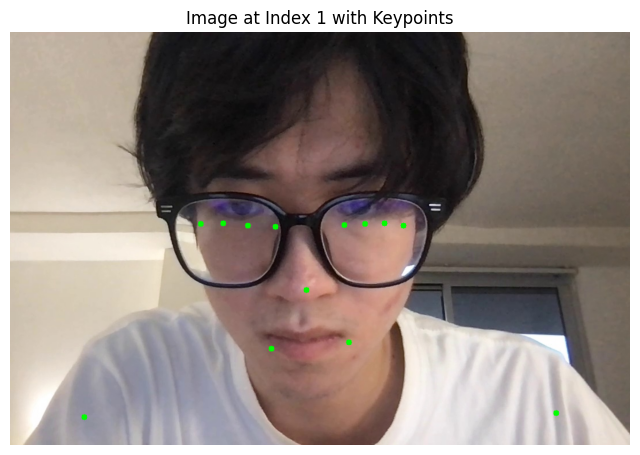

In [69]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def draw_keypoints_on_image(images, keypoints_list, index):
    """
    Draws predicted keypoints on the image at the specified index.

    Args:
    - images (list): List of PIL Image objects.
    - keypoints_list (list): List of keypoints for each image. Each element is a list of [x, y, z] keypoints.
    - index (int): Index of the image to draw keypoints on.

    Returns:
    None
    """
    if index < 0 or index >= len(images):
        print("Index out of range. Please provide a valid index.")
        return

    image = np.array(images[index])  # Convert PIL Image to numpy array
    keypoints = keypoints_list[index]

    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    for keypoint in keypoints:
        x, y, z = keypoint
        if x != 0 and y != 0:  # Skip if keypoint is [0, 0, 0]
            cv2.circle(image_bgr, (int(x), int(y)), radius=5, color=(0, 255, 0), thickness=-1)

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(f"Image at Index {index} with Keypoints")
    plt.show()

draw_keypoints_on_image(images, results_forward[-11:], 1)  # Replace '5' with the desired index


In [74]:
for i in range(3):
    print(f"Keypoint {i} type: {type(results_forward[i])}")
    print(f"Keypoint {i} shape/len: {np.shape(results_forward[i]) if isinstance(results_forward[i], np.ndarray) else len(results_forward[i])}")
    print(f"Keypoint {i} data: {results_forward[i]}\n")

Keypoint 0 type: <class 'list'>
Keypoint 0 shape/len: 0
Keypoint 0 data: []

Keypoint 1 type: <class 'list'>
Keypoint 1 shape/len: 33
Keypoint 1 data: [[458.85279178619385, 493.5075330734253, -1.5124504566192627], [518.9544010162354, 361.1637783050537, -1.4586881399154663], [560.1117396354675, 350.3157448768616, -1.4599939584732056], [591.4102864265442, 342.0261311531067, -1.4598335027694702], [398.53981375694275, 375.5417490005493, -1.435579538345337], [356.96353554725647, 373.4156370162964, -1.4379369020462036], [321.5355885028839, 369.6288728713989, -1.439437747001648], [641.6268396377563, 325.053927898407, -0.8870963454246521], [296.31115078926086, 351.0434818267822, -0.7806410193443298], [540.0435161590576, 572.2134590148926, -1.2570151090621948], [410.7398843765259, 579.9273204803467, -1.2390475273132324], [921.7227172851562, 666.8015813827515, -0.5076673626899719], [129.48950082063675, 677.3738193511963, -0.3339107036590576], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]

In [75]:
import json

def save_keypoints(results, save_path):
    """
    Save keypoints results handling empty lists and 33x3 keypoints
    """
    os.makedirs(save_path, exist_ok=True)
    
    # Save raw format as JSON
    with open(os.path.join(save_path, 'keypoints.json'), 'w') as f:
        json.dump(results, f)
    
    # Convert to numpy with consistent shape (N, 33, 3)
    uniform_results = []
    for keypoint in results:
        if len(keypoint) == 0:  # Empty list
            uniform_results.append(np.zeros((33, 3)))
        else:
            uniform_results.append(np.array(keypoint))
    
    keypoints_array = np.array(uniform_results)
    np.save(os.path.join(save_path, 'keypoints.npy'), keypoints_array)
    
    print(f"Saved {len(results)} keypoints with shape {keypoints_array.shape}")

keypoints_path = "/Users/idrissunmola/Documents/Idris_macbook/Fall_24/ml_proj/SitSmartBackend/keypoints/"
# Usage in main code:
save_path = os.path.join(keypoints_path, "forward_keypoints")
save_keypoints(results_forward, save_path)

Saved 6231 keypoints with shape (6231, 33, 3)


In [77]:
# Testing the function
data_path = "/Users/idrissunmola/Library/CloudStorage/OneDrive-JohnsHopkins/AI System Data/Backwards/frames"
image_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
batch_size = 20
counter = 0
results_backwards = []

# Initialize the model
initialize_model()

for i in range(len(image_files) // batch_size):
    # Load a batch of images
    images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[counter:counter + batch_size]]
    
    # Perform posture detection on the batch
    batch_results = postureDetect(images)
    
    # Append batch results to the main results list
    results_backwards.extend(batch_results)

    # Print keypoints results for the current batch
    # for idx, keypoints in enumerate(batch_results):
    #     print(f"Image {counter + idx}: Keypoints - {keypoints}")
    
    counter += batch_size

# Process remaining images
images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[counter:]]
if images:
    batch_results = postureDetect(images)
    results_backwards.extend(batch_results)

#     # Print keypoints for remaining images
#     for idx, keypoints in enumerate(batch_results):
#         print(f"Image {counter + idx}: Keypoints - {keypoints}")
# 
# # Print final keypoints results
# for idx, keypoints in enumerate(results_backwards):
#     print(f"Image {idx}: Keypoints - {keypoints}")

I0000 00:00:1733968751.780908 12714069 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
I0000 00:00:1733968751.802630 12714069 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733968751.825999 17030809 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733968751.861273 17030821 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733968751.909263 17030809 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733968751.925072 17030821 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733968752.008341 12714069 gl_

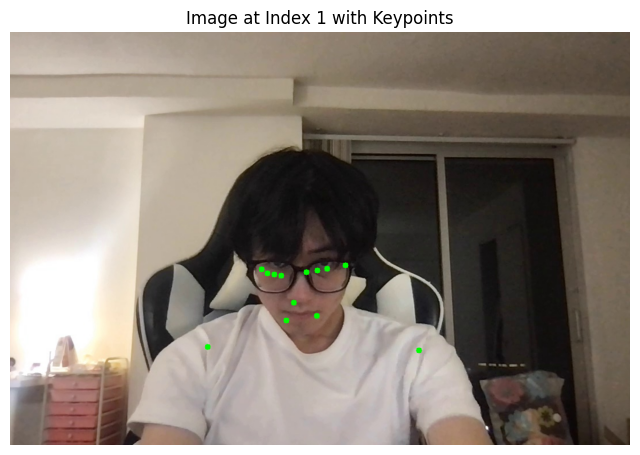

In [84]:
draw_keypoints_on_image(images, results_backwards[-7:], 1)  # Replace '1' with the desired index

In [85]:
keypoints_path = "/Users/idrissunmola/Library/CloudStorage/OneDrive-JohnsHopkins/AI System Data/keypoints/"
# Usage in main code:
save_path = os.path.join(keypoints_path, "backward_keypoints")
save_keypoints(results_backwards, save_path)

Saved 6207 keypoints with shape (6207, 33, 3)


In [86]:
# Testing the function
data_path = "/Users/idrissunmola/Library/CloudStorage/OneDrive-JohnsHopkins/AI System Data/Normal posture/frames"
image_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
batch_size = 20
counter = 0
results_normal = []

# Initialize the model
initialize_model()

for i in range(len(image_files) // batch_size):
    # Load a batch of images
    images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[counter:counter + batch_size]]
    
    # Perform posture detection on the batch
    batch_results = postureDetect(images)
    
    # Append batch results to the main results list
    results_normal.extend(batch_results)

    # Print keypoints results for the current batch
    # for idx, keypoints in enumerate(batch_results):
    #     print(f"Image {counter + idx}: Keypoints - {keypoints}")
    
    counter += batch_size

# Process remaining images
images = [Image.open(os.path.join(data_path, image_file)) for image_file in image_files[counter:]]
if images:
    batch_results = postureDetect(images)
    results_normal.extend(batch_results)

I0000 00:00:1733972477.084140 12714069 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733972477.148996 17166945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733972477.211061 17166949 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733972478.841379 12714069 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1733972478.893693 17167009 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733972478.949470 17167009 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1733972479.027205 12714069 gl_

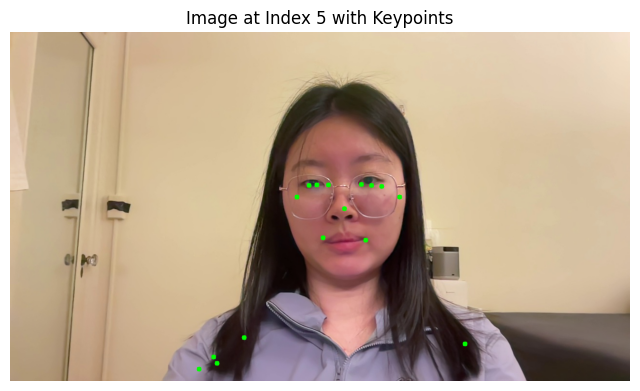

In [92]:
draw_keypoints_on_image(images, results_normal[-6:], 5)  # Replace '1' with the desired index

In [93]:
keypoints_path = "/Users/idrissunmola/Library/CloudStorage/OneDrive-JohnsHopkins/AI System Data/keypoints/"
# Usage in main code
save_path = os.path.join(keypoints_path, "normal_keypoints")
save_keypoints(results_normal, save_path)

Saved 7426 keypoints with shape (7426, 33, 3)


In [ ]:

# testing
# local storage path
data_path = "../../AI System Data/Backwards/frames/"
# Get all files in the data_path folder
image_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]

batch_size = 20
counter = 0

for i in tqdm(np.arange(1000)):    
    
    images = [Image.open(os.path.join(data_path, image_files[i]))]

    if i == 0:
        results_backwards = postureDetect(images)

    else:
        results_backwards = np.concatenate((results_backwards, postureDetect(images)), axis = 0)

  # assert len(results) == len(images)

# Print keypoints results
for idx, keypoints in enumerate(results):
    print(f"Image {idx}: Keypoints - {keypoints}")
counter += batch_size

# assert len(results) == len(images)

# Print keypoints results
for idx, keypoints in enumerate(results):
    print(f"Image {idx}: Keypoints - {keypoints}")

In [17]:
np.save('results_forwards.npy',results_forward)

In [ ]:
results_backward = np.load('../../AI System Data/results_backwards.npy')
results_normal = np.load('../../AI System Data/results_normal.npy')

In [ ]:
results_forward = results_forward[:,:7, :]
results_backward =  results_backward[:,:7, :]
results_normal =  results_normal[:,:7, :]

In [67]:
for i in range(len(results_forward)):
    results_forward[i,:,1] = results_forward[i,:, 1] - results_forward[i,0, 1]
    results_forward[i,:,0] = results_forward[i,:, 0] - results_forward[i,0, 0]
    results_backward[i,:,1] = results_backward[i,:, 1] - results_backward[i,0, 1]
    results_backward[i,:,0] = results_backward[i,:, 0] - results_backward[i,0, 0]
    results_normal[i,:,1] = results_normal[i,:, 1] - results_normal[i,0, 1]
    results_normal[i,:,0] = results_normal[i,:, 0] - results_normal[i,0, 0]

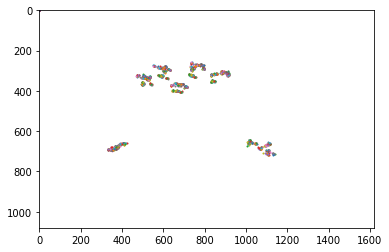

In [40]:
for i in range(1000):
    if int(image_files[i][-8:-4])<1269:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1)
plt.xlim(0,1620)
plt.ylim(1080,0)
plt.show()

In [94]:
data_path = "../../AI System Data/Backwards/frames/"
# Get all files in the data_path folder
image_files = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
arr = []
for i in range(1000):
     if int(image_files[i][-8:-4])<1265:
            arr.append(i)

In [95]:
arr

[3,
 6,
 13,
 18,
 24,
 25,
 26,
 33,
 38,
 39,
 40,
 64,
 69,
 77,
 78,
 83,
 90,
 91,
 98,
 102,
 103,
 105,
 113,
 114,
 117,
 122,
 123,
 132,
 137,
 139,
 140,
 147,
 153,
 160,
 163,
 167,
 174,
 175,
 176,
 182,
 217,
 218,
 226,
 228,
 229,
 232,
 239,
 247,
 251,
 254,
 255,
 262,
 268,
 269,
 276,
 277,
 280,
 286,
 287,
 288,
 295,
 297,
 302,
 310,
 315,
 316,
 323,
 324,
 337,
 352,
 353,
 360,
 364,
 365,
 367,
 375,
 376,
 379,
 388,
 396,
 406,
 407,
 408,
 417,
 419,
 426,
 427,
 434,
 438,
 454,
 466,
 468,
 475,
 476,
 482,
 483,
 487,
 493,
 500,
 502,
 504,
 509,
 512,
 513,
 521,
 522,
 523,
 529,
 534,
 544,
 545,
 546,
 559,
 560,
 567,
 569,
 574,
 595,
 600,
 605,
 607,
 616,
 619,
 620,
 630,
 635,
 644,
 646,
 653,
 654,
 655,
 661,
 664,
 666,
 673,
 674,
 676,
 681,
 686,
 692,
 693,
 698,
 700,
 707,
 711,
 730,
 739,
 740,
 749,
 751,
 756,
 759,
 770,
 771,
 775,
 782,
 785,
 791,
 794,
 805,
 806,
 814,
 823,
 824,
 829,
 830,
 838,
 843,
 859,
 865,
 

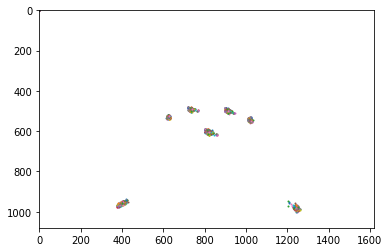

In [44]:
for i in range(1000):
    if 1269<=int(image_files[i][-8:-4])<3029:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1)
plt.xlim(0,1620)
plt.ylim(1080, 0)
plt.show()

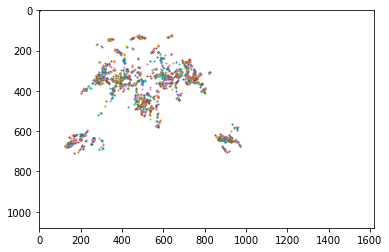

In [42]:
for i in range(1000):
    if 3029<=int(image_files[i][-8:-4])<5007:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1)
plt.xlim(0,1620)
plt.ylim(1080, 0)
plt.show()

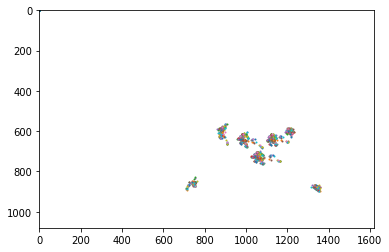

In [45]:
for i in range(1000):
    if int(image_files[i][-8:-4])>=5007:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1)
plt.xlim(0,1620)
plt.ylim(1080, 0)
plt.show()

In [ ]:
for i in range(1000):
    if int(image_files[i][-8:-4])<1269:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1)
plt.xlim(0,1620)
plt.ylim(1080, 0)
plt.show()

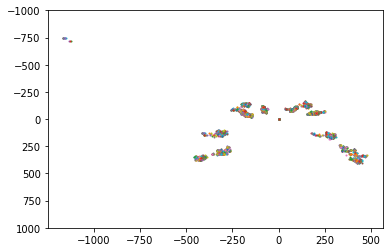

In [86]:
for i in range(1000):
#     if int(image_files[i][-8:-4])<1269:
    if not 3029<=int(image_files[i][-8:-4])<5007:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1)
# plt.xlim(0,1620)
plt.ylim(1000, -1000)
plt.show()

In [81]:
results_backward =  results_backward[:,:7, :]
results_normal =  results_normal[:,:7, :]

In [82]:
for i in range(len(results_forward)):
    results_backward[i,:,1] = results_backward[i,:, 1] - results_backward[i,0, 1]
    results_backward[i,:,0] = results_backward[i,:, 0] - results_backward[i,0, 0]
    results_normal[i,:,1] = results_normal[i,:, 1] - results_normal[i,0, 1]
    results_normal[i,:,0] = results_normal[i,:, 0] - results_normal[i,0, 0]

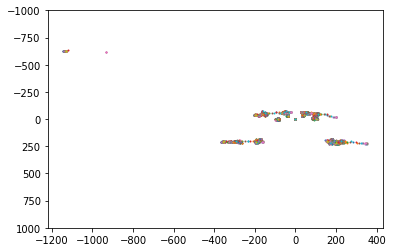

In [83]:
for i in range(1000):
#     if int(image_files[i][-8:-4])<1269:
    plt.scatter(results_backward[i, :, 0],results_backward[i, :, 1], s = 1)
# plt.xlim(0,1620)
plt.ylim(1000, -1000)
plt.show()

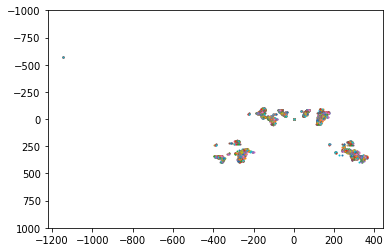

In [84]:
for i in range(1000):
#     if int(image_files[i][-8:-4])<1269:
    plt.scatter(results_normal[i, :, 0],results_normal[i, :, 1], s = 1)
# plt.xlim(0,1620)
plt.ylim(1000, -1000)
plt.show()

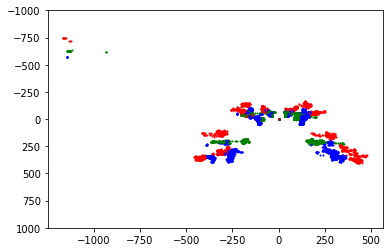

In [87]:
for i in range(1000):
#     if int(image_files[i][-8:-4])<1269:
    plt.scatter(results_normal[i, :, 0],results_normal[i, :, 1], s = 1, color = 'blue')
    plt.scatter(results_backward[i, :, 0],results_backward[i, :, 1], s = 1, color = 'green')
    if not 3029<=int(image_files[i][-8:-4])<5007:
        plt.scatter(results_forward[i, :, 0],results_forward[i, :, 1], s = 1, color = 'red')
        
# plt.xlim(0,1620)
plt.ylim(1000, -1000)
plt.show()

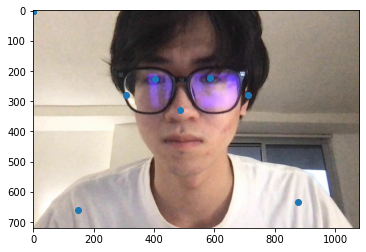

In [32]:
plt.imshow(images[1])
plt.scatter(results[1,:,0], results[1, :, 1])

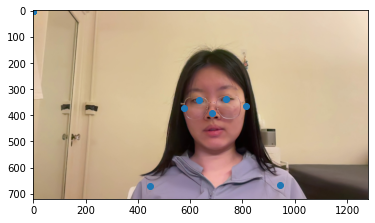

In [20]:
plt.imshow(images[0])
plt.scatter(results[0,:,0], results[0, :, 1])

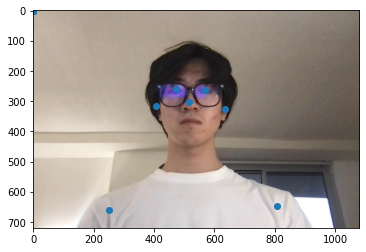

In [21]:
plt.imshow(images[1])
plt.scatter(results[1,:,0], results[1, :, 1])